# Определение перспективного тарифа для телеком компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагаются два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.  

<b>Описание тарифов</b>

<b>Тариф «Смарт»</b>
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

<b>Тариф «Ультра»</b>
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

<b>Примечание:</b>

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.  

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.  

# Сценарий по выполнению проекта

### Шаг 1. Открыть файл с данными и изучить общую информацию<a class="tocSkip"></a>

<b>Путь к файлам:</b>
* <code><b>/datasets/calls.csv</b></code>
* <code><b>/datasets/messages.csv</b></code>
* <code><b>/datasets/internet.csv</b></code>
* <code><b>/datasets/users.csv</b></code>
* <code><b>/datasets/tariffs.csv</b></code>

<b>Описание данных</b>

<b>Таблица</b> <code><b>calls</b></code> (информация о звонках):
* <code><b>id</b></code> — уникальный номер звонка
* <code><b>call_date</b></code> — дата звонка
* <code><b>duration</b></code> — длительность звонка в минутах
* <code><b>user_id</b></code> — идентификатор пользователя, сделавшего звонок

<b>Таблица</b> <code><b>messages</b></code> (информация о сообщениях):
* <code><b>id</b></code> — уникальный номер сообщения
* <code><b>message_date</b></code> — дата сообщения
* <code><b>user_id</b></code> — идентификатор пользователя, отправившего сообщение

<b>Таблица</b> <code><b>internet</b></code> (информация об интернет-сессиях):
* <code><b>id</b></code> — уникальный номер сессии
* <code><b>mb_used</b></code> — объём потраченного за сессию интернет-трафика (в мегабайтах)
* <code><b>session_date</b></code> — дата интернет-сессии
* <code><b>user_id</b></code> — идентификатор пользователя

<b>Таблица</b> <code><b>users</b></code> (информация о пользователях):
* <code><b>user_id</b></code> — уникальный идентификатор пользователя
* <code><b>first_name</b></code> — имя пользователя
* <code><b>last_name</b></code> — фамилия пользователя
* <code><b>age</b></code> — возраст пользователя (годы)
* <code><b>reg_date</b></code> — дата подключения тарифа (день, месяц, год)
* <code><b>churn_date</b></code> — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* <code><b>city</b></code> — город проживания пользователя
* <code><b>tariff</b></code> — название тарифного плана

<b>Таблица</b> <code><b>tariffs</b></code> (информация о тарифах):
* <code><b>tariff_name</b></code> — название тарифа
* <code><b>rub_monthly_fee</b></code> — ежемесячная абонентская плата в рублях
* <code><b>minutes_included</b></code> — количество минут разговора в месяц, включённых в абонентскую плату
* <code><b>messages_included</b></code> — количество сообщений в месяц, включённых в абонентскую плату
* <code><b>mb_per_month_included</b></code> — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* <code><b>rub_per_minute</b></code> — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* <code><b>rub_per_message</b></code> — стоимость отправки сообщения сверх тарифного пакета
* <code><b>rub_per_gb</b></code> — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<b>Примечание.</b> Если объединение таблиц командой <code><b>merge</b></code> приводит к ошибке <code><b>dead kernell</b></code>, примените <code><b>join</b></code>. 

### Шаг 2. Подготовить данные<a class="tocSkip"></a>
* Привести данные к нужным типам;
* Найти и исправить ошибки в данных, если они есть.

Пояснить, какие ошибки нашли и как их исправили. В данных есть звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.  

Посчитать для каждого пользователя:  

* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

### Шаг 3. Проанализировать данные<a class="tocSkip"></a>

Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

### Шаг 4. Проверить гипотезы<a class="tocSkip"></a>
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задать самостоятельно.  

Пояснить:
* как мы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.

### Шаг 5. Написать общий вывод<a class="tocSkip"></a>

<hr style="border: 2px solid indigo;" />

## Шаг 1. Открыть файл с данными и изучить общую информацию

<b>Путь к файлам:</b>
* <code><b>/datasets/calls.csv</b></code>
* <code><b>/datasets/messages.csv</b></code>
* <code><b>/datasets/internet.csv</b></code>
* <code><b>/datasets/users.csv</b></code>
* <code><b>/datasets/tariffs.csv</b></code>

<b>Описание данных</b>

<b>Таблица</b> <code><b>calls</b></code> (информация о звонках):
* <code><b>id</b></code> — уникальный номер звонка
* <code><b>call_date</b></code> — дата звонка
* <code><b>duration</b></code> — длительность звонка в минутах
* <code><b>user_id</b></code> — идентификатор пользователя, сделавшего звонок

<b>Таблица</b> <code><b>messages</b></code> (информация о сообщениях):
* <code><b>id</b></code> — уникальный номер сообщения
* <code><b>message_date</b></code> — дата сообщения
* <code><b>user_id</b></code> — идентификатор пользователя, отправившего сообщение

<b>Таблица</b> <code><b>internet</b></code> (информация об интернет-сессиях):
* <code><b>id</b></code> — уникальный номер сессии
* <code><b>mb_used</b></code> — объём потраченного за сессию интернет-трафика (в мегабайтах)
* <code><b>session_date</b></code> — дата интернет-сессии
* <code><b>user_id</b></code> — идентификатор пользователя

<b>Таблица</b> <code><b>users</b></code> (информация о пользователях):
* <code><b>user_id</b></code> — уникальный идентификатор пользователя
* <code><b>first_name</b></code> — имя пользователя
* <code><b>last_name</b></code> — фамилия пользователя
* <code><b>age</b></code> — возраст пользователя (годы)
* <code><b>reg_date</b></code> — дата подключения тарифа (день, месяц, год)
* <code><b>churn_date</b></code> — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* <code><b>city</b></code> — город проживания пользователя
* <code><b>tariff</b></code> — название тарифного плана

<b>Таблица</b> <code><b>tariffs</b></code> (информация о тарифах):
* <code><b>tariff_name</b></code> — название тарифа
* <code><b>rub_monthly_fee</b></code> — ежемесячная абонентская плата в рублях
* <code><b>minutes_included</b></code> — количество минут разговора в месяц, включённых в абонентскую плату
* <code><b>messages_included</b></code> — количество сообщений в месяц, включённых в абонентскую плату
* <code><b>mb_per_month_included</b></code> — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* <code><b>rub_per_minute</b></code> — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* <code><b>rub_per_message</b></code> — стоимость отправки сообщения сверх тарифного пакета
* <code><b>rub_per_gb</b></code> — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<b>Примечание.</b> Если объединение таблиц командой <code><b>merge</b></code> приводит к ошибке <code><b>dead kernell</b></code>, примените <code><b>join</b></code>. 

Загрузим необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
alpha = 0.05
import seaborn as sns
import os
from collections import Counter
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### Таблица calls (информация о звонках)

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='red'>/datasets/calls.csv = <b>data_calls</b></font>
</div>

Ниже изучив таблицу <code><b>data_calls</b></code> и её столбцы, обратим внимание на:
* не корректный тип данных <code><b>call_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>)

In [2]:
data_calls = pd.read_csv('calls.csv')
display(data_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

In [3]:
display(data_calls.columns)

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

In [4]:
display(data_calls.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [5]:
display(data_calls.sample(10))

,id,call_date,duration,user_id
80827,1201_28,2018-10-26,15.34,1201
193923,1476_220,2018-12-14,9.05,1476
131207,1336_96,2018-12-31,13.43,1336
55647,1142_291,2018-12-03,0.52,1142
27203,1067_113,2018-05-05,0.00,1067
130739,1335_216,2018-09-25,9.77,1335
195759,1480_70,2018-08-13,9.73,1480
198232,1486_65,2018-11-06,5.64,1486
60085,1151_110,2018-12-20,3.76,1151
15140,1040_139,2018-07-11,7.00,1040


In [6]:
display(data_calls.tail(10))

,id,call_date,duration,user_id
202597,1499_210,2018-10-02,8.86,1499
202598,1499_211,2018-12-29,4.58,1499
202599,1499_212,2018-12-30,1.35,1499
202600,1499_213,2018-10-17,10.77,1499
202601,1499_214,2018-12-05,2.42,1499
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


Посчитаем количество пропусков и в каком они формате.

In [7]:
display(pd.concat([data_calls.dtypes, data_calls.isna().sum()], axis=1))

,0,1
id,object,0
call_date,object,0
duration,float64,0
user_id,int64,0


Изучим таблицу через <code><b>.describe()</b></code>

In [8]:
display(data_calls.describe(include='all'))

,id,call_date,duration,user_id
count,202607,202607,202607.000000,202607.000000
unique,202607,365,NaN,NaN
top,1352_445,2018-12-31,NaN,NaN
freq,1,1435,NaN,NaN
mean,NaN,NaN,6.755887,1253.940619
std,NaN,NaN,5.843365,144.722751
min,NaN,NaN,0.000000,1000.000000
25%,NaN,NaN,1.300000,1126.000000
50%,NaN,NaN,6.000000,1260.000000
75%,NaN,NaN,10.700000,1379.000000


Посмотрим отдельно уникальные значения по каждому столбцу.

In [9]:
# создадим простейшую функцию проверки уникальных значений
def display_unique(data, column):
    display(data[column].unique())
    display(data[column].value_counts())
    print('Всего уникальных значений:', len(data[column].unique()))

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_calls['id']</b></font> — уникальный номер звонка
</div>

In [10]:
display_unique(data_calls, 'id')

array(['1000_0', '1000_1', '1000_2', ..., '1499_217', '1499_218',
       '1499_219'], dtype=object)

1352_445    1
1241_125    1
1386_93     1
1391_404    1
1472_752    1
           ..
1381_18     1
1421_151    1
1080_291    1
1187_19     1
1248_465    1
Name: id, Length: 202607, dtype: int64

Всего уникальных значений: 202607


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_calls['call_date']</b></font> — дата звонка
</div>

In [11]:
display_unique(data_calls, 'call_date')

array(['2018-07-25', '2018-08-17', '2018-06-11', '2018-09-21',
       '2018-12-15', '2018-11-02', '2018-10-18', '2018-08-22',
       '2018-09-15', '2018-08-15', '2018-05-28', '2018-07-05',
       '2018-09-29', '2018-12-11', '2018-07-27', '2018-08-11',
       '2018-08-02', '2018-06-15', '2018-12-04', '2018-08-20',
       '2018-09-25', '2018-07-21', '2018-08-27', '2018-08-25',
       '2018-12-12', '2018-07-19', '2018-11-14', '2018-12-26',
       '2018-12-02', '2018-10-08', '2018-09-23', '2018-10-09',
       '2018-05-25', '2018-06-13', '2018-10-25', '2018-12-29',
       '2018-07-12', '2018-11-20', '2018-06-05', '2018-10-13',
       '2018-06-26', '2018-07-14', '2018-07-20', '2018-12-01',
       '2018-06-17', '2018-10-24', '2018-11-26', '2018-09-19',
       '2018-05-30', '2018-12-21', '2018-12-23', '2018-07-03',
       '2018-10-04', '2018-09-16', '2018-11-21', '2018-10-28',
       '2018-08-29', '2018-08-13', '2018-07-18', '2018-06-03',
       '2018-09-03', '2018-08-14', '2018-11-01', '2018-

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

Всего уникальных значений: 365


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_calls['duration']</b></font> — длительность звонка в минутах
</div>

In [12]:
display_unique(data_calls, 'duration')

array([ 0.  ,  2.85, 13.8 , ..., 24.36, 24.5 , 26.9 ])

0.00     39613
5.50       142
4.49       142
6.15       141
6.38       141
         ...  
26.32        1
24.51        1
27.24        1
29.89        1
27.43        1
Name: duration, Length: 2871, dtype: int64

Всего уникальных значений: 2871


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_calls['user_id']</b></font> — идентификатор пользователя, сделавшего звонок
</div>

In [13]:
display_unique(data_calls, 'user_id')

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,
       1100, 1101, 1102, 1103, 1104, 1105, 1107, 1108, 1109, 1110, 1111,
       1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
       1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132, 1133, 1134,
       1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145,
       1146, 1147, 1148, 1149, 1150, 1151, 1152, 11

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

Всего уникальных значений: 492


### Таблица messages (информация о сообщениях)

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='red'>/datasets/messages.csv = <b>data_messages</b></font>
</div>

Ниже изучив таблицу <code><b>data_messages</b></code> и её столбцы, обратим внимание на:
* не корректный тип данных <code><b>message_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>)

In [14]:
data_messages = pd.read_csv('messages.csv')
display(data_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

In [15]:
display(data_messages.columns)

Index(['id', 'message_date', 'user_id'], dtype='object')

In [16]:
display(data_messages.head(10))

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [17]:
display(data_messages.sample(10))

,id,message_date,user_id
87447,1364_181,2018-10-07,1364
119014,1482_576,2018-06-06,1482
24622,1102_49,2018-09-16,1102
105322,1425_566,2018-03-09,1425
62979,1274_565,2018-10-08,1274
79136,1331_359,2018-12-04,1331
13028,1054_584,2018-04-03,1054
73295,1310_164,2018-08-30,1310
30380,1134_98,2018-09-14,1134
23913,1099_120,2018-10-22,1099


In [18]:
display(data_messages.tail(10))

,id,message_date,user_id
123026,1499_174,2018-12-14,1499
123027,1499_175,2018-10-09,1499
123028,1499_176,2018-12-17,1499
123029,1499_177,2018-12-30,1499
123030,1499_178,2018-10-25,1499
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


Посчитаем количество пропусков и в каком они формате.

In [19]:
display(pd.concat([data_messages.dtypes, data_messages.isna().sum()], axis=1))

,0,1
id,object,0
message_date,object,0
user_id,int64,0


Изучим таблицу через <code><b>.describe()</b></code>

In [20]:
display(data_messages.describe(include='all'))

,id,message_date,user_id
count,123036,123036,123036.000000
unique,123036,364,NaN
top,1057_202,2018-12-31,NaN
freq,1,859,NaN
mean,NaN,NaN,1256.989410
std,NaN,NaN,143.523967
min,NaN,NaN,1000.000000
25%,NaN,NaN,1134.000000
50%,NaN,NaN,1271.000000
75%,NaN,NaN,1381.000000


Посмотрим отдельно уникальные значения по каждому столбцу.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_messages['id']</b></font> — уникальный номер сообщения
</div>

In [21]:
display_unique(data_messages, 'id')

array(['1000_0', '1000_1', '1000_2', ..., '1499_181', '1499_182',
       '1499_183'], dtype=object)

1057_202    1
1396_694    1
1401_473    1
1004_674    1
1356_121    1
           ..
1173_15     1
1052_366    1
1138_4      1
1401_236    1
1052_331    1
Name: id, Length: 123036, dtype: int64

Всего уникальных значений: 123036


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_messages['message_date']</b></font> — дата сообщения
</div>

In [22]:
display_unique(data_messages, 'message_date')

array(['2018-06-27', '2018-10-08', '2018-08-04', '2018-06-16',
       '2018-12-05', '2018-06-20', '2018-11-19', '2018-10-29',
       '2018-06-25', '2018-12-18', '2018-05-30', '2018-07-06',
       '2018-08-20', '2018-10-30', '2018-09-14', '2018-08-28',
       '2018-06-29', '2018-07-07', '2018-05-29', '2018-05-28',
       '2018-08-15', '2018-07-29', '2018-12-07', '2018-12-25',
       '2018-10-31', '2018-07-30', '2018-11-05', '2018-12-15',
       '2018-12-04', '2018-06-30', '2018-12-22', '2018-10-02',
       '2018-08-29', '2018-09-09', '2018-07-19', '2018-09-04',
       '2018-07-15', '2018-10-25', '2018-12-08', '2018-06-01',
       '2018-06-12', '2018-12-21', '2018-10-07', '2018-08-30',
       '2018-06-04', '2018-10-01', '2018-06-22', '2018-10-12',
       '2018-10-15', '2018-10-24', '2018-09-20', '2018-08-22',
       '2018-09-17', '2018-08-27', '2018-07-26', '2018-06-05',
       '2018-11-16', '2018-09-06', '2018-11-26', '2018-11-18',
       '2018-09-21', '2018-07-11', '2018-07-16', '2018-

2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-28    699
             ... 
2018-01-11     12
2018-01-02     10
2018-01-04     10
2018-01-05     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64

Всего уникальных значений: 364


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_messages['user_id']</b></font> — идентификатор пользователя, отправившего сообщение
</div>

In [23]:
display_unique(data_messages, 'user_id')

array([1000, 1002, 1003, 1004, 1005, 1007, 1008, 1009, 1011, 1012, 1013,
       1014, 1015, 1016, 1018, 1019, 1020, 1021, 1022, 1023, 1025, 1026,
       1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037,
       1038, 1039, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1050,
       1051, 1052, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062,
       1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
       1075, 1076, 1077, 1079, 1080, 1081, 1082, 1083, 1084, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1096, 1097, 1098, 1099,
       1100, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1110, 1111, 1112,
       1113, 1115, 1119, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1130,
       1131, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1154, 1155, 1156,
       1158, 1159, 1160, 1161, 1163, 1164, 1165, 1166, 1167, 1168, 1169,
       1170, 1171, 1172, 1173, 1174, 1176, 1178, 11

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1111       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

Всего уникальных значений: 426


### Таблица internet (информация об интернет-сессиях)

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='red'>/datasets/internet.csv = <b>data_internet</b></font>
</div>

Ниже изучив таблицу <code><b>data_internet</b></code> и её столбцы, обратим внимание на:
* не корректный тип данных <code><b>session_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>)
* не корректный столбец <code><b>Unnamed: 0</b></code> - убрать с помощью <code><b>index_col=0</b></code>

In [24]:
data_internet = pd.read_csv('internet.csv', index_col=0)
display(data_internet.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

In [25]:
display(data_internet.columns)

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [26]:
display(data_internet.head(10))

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [27]:
display(data_internet.sample(10))

,id,mb_used,session_date,user_id
115790,1390_238,503.25,2018-12-16,1390
8156,1027_483,334.80,2018-07-08,1027
49217,1169_332,476.04,2018-10-17,1169
87748,1298_41,216.78,2018-09-09,1298
29567,1103_25,817.76,2018-12-30,1103
43490,1149_490,673.03,2018-11-07,1149
105395,1356_394,429.06,2018-12-01,1356
127779,1428_217,65.66,2018-08-26,1428
114464,1385_672,857.07,2018-06-08,1385
115910,1391_43,67.92,2018-12-15,1391


In [28]:
display(data_internet.tail(10))

,id,mb_used,session_date,user_id
149386,1499_147,0.00,2018-10-21,1499
149387,1499_148,268.19,2018-11-13,1499
149388,1499_149,778.68,2018-11-24,1499
149389,1499_150,273.98,2018-11-20,1499
149390,1499_151,752.72,2018-10-11,1499
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499
149395,1499_156,544.37,2018-10-26,1499


Посчитаем количество пропусков и в каком они формате.

In [29]:
display(pd.concat([data_internet.dtypes, data_internet.isna().sum()], axis=1))

,0,1
id,object,0
mb_used,float64,0
session_date,object,0
user_id,int64,0


Изучим таблицу через <code><b>.describe()</b></code>

In [30]:
display(data_internet.describe(include='all'))

,id,mb_used,session_date,user_id
count,149396,149396.000000,149396,149396.000000
unique,149396,NaN,365,NaN
top,1057_202,NaN,2018-12-31,NaN
freq,1,NaN,1057,NaN
mean,NaN,370.192426,NaN,1252.099842
std,NaN,278.300951,NaN,144.050823
min,NaN,0.000000,NaN,1000.000000
25%,NaN,138.187500,NaN,1130.000000
50%,NaN,348.015000,NaN,1251.000000
75%,NaN,559.552500,NaN,1380.000000


Посмотрим отдельно уникальные значения по каждому столбцу.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_internet['id']</b></font> — уникальный номер сессии
</div>

In [31]:
display_unique(data_internet, 'id')

array(['1000_0', '1000_1', '1000_2', ..., '1499_154', '1499_155',
       '1499_156'], dtype=object)

1057_202    1
1092_344    1
1334_35     1
1224_138    1
1204_90     1
           ..
1012_193    1
1403_92     1
1113_395    1
1337_503    1
1395_398    1
Name: id, Length: 149396, dtype: int64

Всего уникальных значений: 149396


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_internet['mb_used']</b></font> — объём потраченного за сессию интернет-трафика (в мегабайтах)
</div>

In [32]:
display_unique(data_internet, 'mb_used')

array([ 112.95, 1052.81, 1197.26, ...,  460.75,  247.59,   23.72])

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
182.69        1
726.03        1
315.12        1
898.99        1
677.66        1
Name: mb_used, Length: 70003, dtype: int64

Всего уникальных значений: 70003


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_internet['session_date']</b></font> — дата интернет-сессии
</div>

In [33]:
display_unique(data_internet, 'session_date')

array(['2018-11-25', '2018-09-07', '2018-06-25', '2018-08-22',
       '2018-09-24', '2018-10-02', '2018-07-11', '2018-10-08',
       '2018-09-03', '2018-09-27', '2018-08-28', '2018-06-20',
       '2018-08-09', '2018-08-11', '2018-07-21', '2018-06-09',
       '2018-06-03', '2018-11-01', '2018-11-28', '2018-08-20',
       '2018-12-06', '2018-07-02', '2018-10-19', '2018-10-30',
       '2018-06-17', '2018-11-06', '2018-09-14', '2018-11-15',
       '2018-08-26', '2018-10-15', '2018-11-27', '2018-10-17',
       '2018-10-07', '2018-08-05', '2018-07-06', '2018-10-03',
       '2018-11-02', '2018-06-30', '2018-11-17', '2018-06-06',
       '2018-11-20', '2018-05-31', '2018-10-29', '2018-12-10',
       '2018-07-04', '2018-12-28', '2018-05-28', '2018-09-15',
       '2018-09-09', '2018-09-17', '2018-09-01', '2018-11-03',
       '2018-11-04', '2018-06-16', '2018-12-07', '2018-08-25',
       '2018-06-15', '2018-06-26', '2018-10-06', '2018-12-01',
       '2018-10-14', '2018-06-07', '2018-12-15', '2018-

2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-01       3
2018-01-02       3
Name: session_date, Length: 365, dtype: int64

Всего уникальных значений: 365


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_internet['user_id']</b></font> — идентификатор пользователя
</div>

In [34]:
display_unique(data_internet, 'user_id')

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132,
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 11

1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

Всего уникальных значений: 497


### Таблица users (информация о пользователях)

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='red'>/datasets/users.csv = <b>data_users</b></font>
</div>

Ниже изучив таблицу <code><b>data_users</b></code> и её столбцы, обратим внимание на:
* не корректный тип данных <code><b>reg_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>)
* не корректный тип данных <code><b>churn_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>)
* в столбце <code><b>churn_date</b></code> есть пропуски - заполнить условной датой <code><b>2019-01-01</b></code> (выборка предоставлена за 2018 год и соответственно все кто не завершили сотрудничество в этом году, автоматически переходят на сотрудничество в следующем году)


In [35]:
data_users = pd.read_csv('users.csv')
display(data_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [36]:
display(data_users.columns)

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

In [37]:
display(data_users.head(10))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [38]:
display(data_users.sample(10))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
476,1476,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra
179,1179,43,NaN,Вологда,Дана,Астапенко,2018-04-19,smart
344,1344,60,NaN,Воронеж,Илзе,Игнатьева,2018-04-03,ultra
439,1439,62,NaN,Орёл,Евгения,Афонина,2018-06-30,smart
189,1189,39,NaN,Санкт-Петербург,Аюна,Зубкова,2018-01-30,smart
45,1045,48,NaN,Улан-Удэ,Джемма,Карасева,2018-01-30,smart
160,1160,73,NaN,Ульяновск,Борис,Авдонюшкин,2018-07-03,smart
162,1162,63,NaN,Москва,Марта,Минаева,2018-10-09,smart
233,1233,28,NaN,Воронеж,Сара,Алфимова,2018-05-23,smart
400,1400,71,NaN,Москва,Ренат,Артёмов,2018-08-24,smart


In [39]:
display(data_users.tail(10))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
490,1490,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart
491,1491,56,NaN,Челябинск,Радислав,Андрейкин,2018-04-25,ultra
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
493,1493,71,NaN,Красноярск,Таисия,Ахматулина,2018-11-24,ultra
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


Посчитаем количество пропусков и в каком они формате.

In [40]:
display(pd.concat([data_users.dtypes, data_users.isna().sum()], axis=1))

,0,1
user_id,int64,0
age,int64,0
churn_date,object,462
city,object,0
first_name,object,0
last_name,object,0
reg_date,object,0
tariff,object,0


Изучим таблицу через <code><b>.describe()</b></code>

In [41]:
display(data_users.describe(include='all'))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
count,500.000000,500.00000,38,500,500,500,500,500
unique,NaN,NaN,33,76,246,419,270,2
top,NaN,NaN,2018-10-03,Москва,Радим,Андреенко,2018-05-28,smart
freq,NaN,NaN,2,99,6,5,8,351
mean,1249.500000,46.58800,NaN,NaN,NaN,NaN,NaN,NaN
std,144.481833,16.66763,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,18.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1124.750000,32.00000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1249.500000,46.00000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1374.250000,62.00000,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим отдельно уникальные значения по каждому столбцу.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_users['user_id']</b></font> — уникальный идентификатор пользователя
</div>

In [42]:
display_unique(data_users, 'user_id')

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

1024    1
1353    1
1366    1
1365    1
1364    1
       ..
1185    1
1184    1
1183    1
1182    1
1023    1
Name: user_id, Length: 500, dtype: int64

Всего уникальных значений: 500


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_users['first_name']</b></font> — имя пользователя
</div>

In [43]:
display_unique(data_users, 'first_name')

array(['Рафаил', 'Иван', 'Евгений', 'Белла', 'Татьяна', 'Афанасий',
       'Леонид', 'Юна', 'Рустэм', 'Василиса', 'Эдуард', 'Веселина',
       'Варлам', 'Борис', 'Яков', 'Рузана', 'Марица', 'Мария', 'Матвей',
       'Игнатий', 'Тала', 'Святослав', 'Людмила', 'Иулиан', 'Владислав',
       'Рустем', 'Алексей', 'Мариетта', 'Лаврентий', 'Инна', 'Лия',
       'Розалия', 'Анжелика', 'Изольда', 'Агнесса', 'Юрий', 'Михаил',
       'Константин', 'Марианна', 'Иннокентий', 'Джемма', 'Екатерина',
       'Милица', 'Лола', 'Габриель', 'Кристина', 'Павел', 'Ренальд',
       'Луиза', 'Радислав', 'Динара', 'Лукий', 'Глеб', 'Тамара',
       'Александр', 'Таира', 'Роза', 'Исак', 'Юзефа', 'Ким', 'Гордей',
       'Эльза', 'Гектор', 'Андрей', 'Рафаэль', 'Фёдор', 'Харитон',
       'Еремей', 'Всеволод', 'Софья', 'Авксентий', 'Виолетта', 'Ириней',
       'Гелена', 'Ксения', 'Вера', 'Вениамин', 'Вероника', 'Даниэла',
       'Алла', 'Элеонора', 'Аюна', 'Руслан', 'Онисим', 'Марта', 'Эльвира',
       'Габриэль', '

Радим       6
Пётр        5
Леонид      5
Клавдия     4
Тамара      4
           ..
Трофим      1
Белла       1
Юрий        1
Анжелика    1
Анита       1
Name: first_name, Length: 246, dtype: int64

Всего уникальных значений: 246


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_users['last_name']</b></font> — фамилия пользователя
</div>

In [44]:
display_unique(data_users, 'last_name')

array(['Верещагин', 'Ежов', 'Абрамович', 'Белякова', 'Авдеенко', 'Горлов',
       'Ермолаев', 'Березина', 'Пономарёв', 'Блинова', 'Кононов',
       'Алёшко', 'Соловьев', 'Андреенко', 'Акинфьев', 'Алюшина',
       'Сазонова', 'Аленникова', 'Золотов', 'Круглов', 'Костина',
       'Тихонов', 'Трофимова', 'Мельникова', 'Антипов', 'Акинин',
       'Бородин', 'Авдеев', 'Евсеев', 'Селезнев', 'Русанова', 'Тимофеев',
       'Игнатьева', 'Бабушкина', 'Бондарев', 'Аракина', 'Андропова',
       'Архипова', 'Денисова', 'Одинцов', 'Кравцов', 'Добрынин',
       'Родионова', 'Рябов', 'Карасева', 'Александрова', 'Меркулова',
       'Мясникова', 'Ларин', 'Аничкина', 'Сомова', 'Панов', 'Фёдоров',
       'Платонова', 'Артемьев', 'Дьячкова', 'Глушков', 'Свиридов',
       'Рудаков', 'Ситникова', 'Коршунов', 'Климова', 'Алфеева',
       'Игнатова', 'Малахов', 'Абашкина', 'Демьянов', 'Кочетов',
       'Селиванова', 'Чумаков', 'Андрейкин', 'Павловский', 'Никулин',
       'Шарапов', 'Кольцова', 'Литвинов', 'Авр

Андреенко     5
Аркадьев      3
Алексеенко    3
Булгаков      3
Соловьев      3
             ..
Симонова      1
Авросимова    1
Суслова       1
Алешкова      1
Борисова      1
Name: last_name, Length: 419, dtype: int64

Всего уникальных значений: 419


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_users['age']</b></font> — возраст пользователя (годы)
</div>

In [45]:
display_unique(data_users, 'age')

array([52, 41, 59, 23, 68, 67, 21, 65, 63, 24, 26, 44, 38, 36, 64, 58, 73,
       71, 61, 72, 42, 56, 32, 62, 20, 51, 28, 66, 31, 37, 47, 40, 69, 48,
       33, 39, 43, 46, 45, 55, 53, 34, 49, 25, 18, 70, 50, 19, 54, 60, 29,
       27, 74, 22, 30, 75, 57, 35], dtype=int64)

53    14
42    14
63    13
64    13
71    13
21    12
40    12
73    12
29    11
39    11
37    11
47    11
26    11
41    10
45    10
58    10
36    10
70    10
52    10
65     9
66     9
56     9
68     9
20     9
51     9
50     9
48     9
30     9
19     9
24     9
28     9
27     9
23     9
62     8
60     8
55     8
69     8
44     8
25     7
31     7
35     7
67     7
74     7
43     7
32     7
46     7
18     6
59     6
54     6
75     6
38     5
34     5
72     5
33     5
22     5
57     4
49     4
61     3
Name: age, dtype: int64

Всего уникальных значений: 58


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_users['reg_date']</b></font> — дата подключения тарифа (день, месяц, год)
</div>

In [46]:
display_unique(data_users, 'reg_date')

array(['2018-05-25', '2018-11-01', '2018-06-17', '2018-08-17',
       '2018-05-14', '2018-01-25', '2018-02-26', '2018-04-19',
       '2018-12-19', '2018-03-22', '2018-08-05', '2018-03-19',
       '2018-03-28', '2018-11-14', '2018-05-15', '2018-04-30',
       '2018-11-21', '2018-05-22', '2018-04-01', '2018-05-16',
       '2018-10-22', '2018-04-26', '2018-12-01', '2018-10-31',
       '2018-03-15', '2018-10-06', '2018-04-10', '2018-10-02',
       '2018-09-15', '2018-05-23', '2018-11-02', '2018-01-04',
       '2018-07-15', '2018-08-26', '2018-04-03', '2018-07-14',
       '2018-10-13', '2018-10-07', '2018-06-21', '2018-06-08',
       '2018-11-29', '2018-11-25', '2018-07-08', '2018-05-09',
       '2018-01-30', '2018-08-20', '2018-10-29', '2018-08-19',
       '2018-03-10', '2018-06-16', '2018-05-28', '2018-07-27',
       '2018-09-30', '2018-03-20', '2018-01-02', '2018-04-13',
       '2018-03-12', '2018-04-14', '2018-11-24', '2018-11-16',
       '2018-04-12', '2018-03-17', '2018-03-08', '2018-

2018-05-28    8
2018-04-03    5
2018-07-16    5
2018-01-04    5
2018-11-16    5
             ..
2018-05-14    1
2018-09-05    1
2018-10-03    1
2018-05-02    1
2018-08-26    1
Name: reg_date, Length: 270, dtype: int64

Всего уникальных значений: 270


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_users['churn_date']</b></font> — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
</div>

In [47]:
display_unique(data_users, 'churn_date')

array([nan, '2018-10-05', '2018-12-18', '2018-11-21', '2018-10-03',
       '2018-10-14', '2018-12-09', '2018-12-11', '2018-12-26',
       '2018-08-31', '2018-12-03', '2018-12-23', '2018-11-07',
       '2018-12-16', '2018-12-20', '2018-11-30', '2018-12-21',
       '2018-08-17', '2018-09-02', '2018-10-04', '2018-11-13',
       '2018-11-22', '2018-10-28', '2018-11-26', '2018-11-27',
       '2018-11-16', '2018-10-27', '2018-12-30', '2018-09-27',
       '2018-12-25', '2018-12-14', '2018-12-24', '2018-09-26',
       '2018-10-25'], dtype=object)

2018-10-03    2
2018-12-03    2
2018-12-21    2
2018-10-14    2
2018-12-09    2
2018-11-21    1
2018-12-20    1
2018-10-28    1
2018-09-26    1
2018-11-26    1
2018-12-26    1
2018-10-27    1
2018-09-27    1
2018-11-30    1
2018-12-30    1
2018-10-25    1
2018-12-16    1
2018-11-13    1
2018-10-05    1
2018-12-25    1
2018-12-23    1
2018-10-04    1
2018-12-18    1
2018-12-24    1
2018-11-22    1
2018-08-31    1
2018-12-14    1
2018-11-27    1
2018-11-07    1
2018-09-02    1
2018-12-11    1
2018-11-16    1
2018-08-17    1
Name: churn_date, dtype: int64

Всего уникальных значений: 34


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_users['city']</b></font> — город проживания пользователя
</div>

In [48]:
display_unique(data_users, 'city')

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Москва             99
Санкт-Петербург    39
Новосибирск        16
Казань             14
Омск               14
                   ..
Архангельск         1
Подольск            1
Химки               1
Иваново             1
Нижневартовск       1
Name: city, Length: 76, dtype: int64

Всего уникальных значений: 76


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_users['tariff']</b></font> — название тарифного плана
</div>

In [49]:
display_unique(data_users, 'tariff')

array(['ultra', 'smart'], dtype=object)

smart    351
ultra    149
Name: tariff, dtype: int64

Всего уникальных значений: 2


### Таблица tariffs (информация о тарифах)

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='red'>/datasets/tariffs.csv = <b>data_tariffs</b></font>
</div>

Ниже изучив таблицу <code><b>data_tariffs</b></code> и её столбцы, ошибок не обнаружили.

In [50]:
data_tariffs = pd.read_csv('tariffs.csv')
display(data_tariffs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

In [51]:
display(data_tariffs.columns)

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

In [52]:
display(data_tariffs.head(10))

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Посчитаем количество пропусков и в каком они формате.

In [53]:
display(pd.concat([data_tariffs.dtypes, data_tariffs.isna().sum()], axis=1))

,0,1
messages_included,int64,0
mb_per_month_included,int64,0
minutes_included,int64,0
rub_monthly_fee,int64,0
rub_per_gb,int64,0
rub_per_message,int64,0
rub_per_minute,int64,0
tariff_name,object,0


Изучим таблицу через <code><b>.describe()</b></code>

In [54]:
display(data_tariffs.describe(include='all'))

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smart
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000,NaN
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214,NaN
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,NaN
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000,NaN
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000,NaN
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000,NaN


Посмотрим отдельно уникальные значения по каждому столбцу.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_tariffs['tariff_name']</b></font> — название тарифа
</div>

In [55]:
display_unique(data_tariffs, 'tariff_name')

array(['smart', 'ultra'], dtype=object)

smart    1
ultra    1
Name: tariff_name, dtype: int64

Всего уникальных значений: 2


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_tariffs['rub_monthly_fee']</b></font> — ежемесячная абонентская плата в рублях
</div>

In [56]:
display_unique(data_tariffs, 'rub_monthly_fee')

array([ 550, 1950], dtype=int64)

1950    1
550     1
Name: rub_monthly_fee, dtype: int64

Всего уникальных значений: 2


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_tariffs['minutes_included']</b></font> — количество минут разговора в месяц, включённых в абонентскую плату
</div>

In [57]:
display_unique(data_tariffs, 'minutes_included')

array([ 500, 3000], dtype=int64)

500     1
3000    1
Name: minutes_included, dtype: int64

Всего уникальных значений: 2


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_tariffs['messages_included']</b></font> — количество сообщений в месяц, включённых в абонентскую плату
</div>

In [58]:
display_unique(data_tariffs, 'messages_included')

array([  50, 1000], dtype=int64)

1000    1
50      1
Name: messages_included, dtype: int64

Всего уникальных значений: 2


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_tariffs['mb_per_month_included']</b></font> — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
</div>

In [59]:
display_unique(data_tariffs, 'mb_per_month_included')

array([15360, 30720], dtype=int64)

15360    1
30720    1
Name: mb_per_month_included, dtype: int64

Всего уникальных значений: 2


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_tariffs['rub_per_minute']</b></font> — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
</div>

In [60]:
display_unique(data_tariffs, 'rub_per_minute')

array([3, 1], dtype=int64)

1    1
3    1
Name: rub_per_minute, dtype: int64

Всего уникальных значений: 2


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_tariffs['rub_per_message']</b></font> — стоимость отправки сообщения сверх тарифного пакета
</div>

In [61]:
display_unique(data_tariffs, 'rub_per_message')

array([3, 1], dtype=int64)

1    1
3    1
Name: rub_per_message, dtype: int64

Всего уникальных значений: 2


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_tariffs['rub_per_gb']</b></font> — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
</div>

In [62]:
display_unique(data_tariffs, 'rub_per_gb')

array([200, 150], dtype=int64)

200    1
150    1
Name: rub_per_gb, dtype: int64

Всего уникальных значений: 2


<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<font color='green'><b>ВЫВОД:</b></font><br>
Выше изучив данные по таблицам  в том числе по столбцам, обращаем внимание на:
<br>
    
<b>Таблица 1</b> (<code><b>data_calls</b></code>):
<br>

- в датасете <code><b>data_calls</b></code> - 202607 строк и 4 столбца, данные без пропусков;<br>
- <code><b>data_calls.columns</b></code> - все названия столбцов корректные;<br>    
- не корректный тип данных <code><b>call_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>).
<br>  

<b>Таблица 2</b> (<code><b>data_messages</b></code>):
<br>

- в датасете <code><b>data_messages</b></code> - 123036 строк и 3 столбца, данные без пропусков;<br>
- <code><b>data_messages.columns</b></code> - все названия столбцов корректные;<br>   
- не корректный тип данных <code><b>message_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>).
<br>
    
<b>Таблица 3</b> (<code><b>data_internet</b></code>):
<br>

- в датасете <code><b>data_internet</b></code> - 149396 строк и 4 столбца, данные без пропусков;<br>    
- не корректный тип данных <code><b>session_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>);<br>
- не корректный столбец <code><b>Unnamed: 0</b></code> - сразу убрали с помощью <code><b>index_col=0</b></code>.
<br>    
    
<b>Таблица 4</b> (<code><b>data_users</b></code>):
<br>

- в датасете <code><b>data_users</b></code> - 500 строк и 8 столбца;<br>
- не корректный тип данных <code><b>reg_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>);<br>
- не корректный тип данных <code><b>churn_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>);<br>
- в столбце <code><b>churn_date</b></code> есть 462 пропуска - заполнить условной датой <code><b>2019-01-01</b></code> (выборка предоставлена за 2018 год и соответственно все кто не завершили сотрудничество в этом году, автоматически переходят на сотрудничество в следующем году)
<br>
    
<b>Таблица 5</b> (<code><b>data_tariffs</b></code>):
<br>

- в датасете <code><b>data_tariffs</b></code> - 2 строки и 8 столбцов, данные без пропусков;<br>
- <code><b>data_tariffs.columns</b></code> - все названия столбцов корректные.<br>    
   
</div>

<hr style="border: 2px solid indigo;" />

## Шаг 2. Подготовить данные
* Привести данные к нужным типам;
* Найти и исправить ошибки в данных, если они есть.

Пояснить, какие ошибки нашли и как их исправили. В данных есть звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.  

Посчитать для каждого пользователя:  

* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

### Таблица calls (информация о звонках)

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='red'>1) не корректный тип данных <code><b>call_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>)</font><br>
<font color='red'>2) проверить на дубли <code><b>.duplicated()</b></code></font><br>
</div>

Изменим тип данных с помощью <code><b>pd.to_datetime</b></code>

In [63]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format = '%Y-%m-%d')
display(data_calls['call_date'].head())

0   2018-07-25
1   2018-08-17
2   2018-06-11
3   2018-09-21
4   2018-12-15
Name: call_date, dtype: datetime64[ns]

Проверим данные на предмет дубликатов <code><b>.duplicated()</b></code>.

In [64]:
display(data_calls.duplicated().sum())

0

In [65]:
display(data_calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


### Таблица messages (информация о сообщениях)

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='red'>1) не корректный тип данных <code><b>message_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>)</font><br>
<font color='red'>2) проверить на дубли <code><b>.duplicated()</b></code></font>
</div>

Изменим тип данных с помощью <code><b>pd.to_datetime</b></code>

In [66]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format = '%Y-%m-%d')
display(data_messages['message_date'].head())

0   2018-06-27
1   2018-10-08
2   2018-08-04
3   2018-06-16
4   2018-12-05
Name: message_date, dtype: datetime64[ns]

Проверим данные на предмет дубликатов <code><b>.duplicated()</b></code>.

In [67]:
display(data_messages.duplicated().sum())

0

In [68]:
display(data_messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


### Таблица internet (информация об интернет-сессиях)

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='red'>1) не корректный тип данных <code><b>session_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>)</font><br>
<font color='red'>2) проверить на дубли <code><b>.duplicated()</b></code></font>
</div>

Изменим тип данных с помощью <code><b>pd.to_datetime</b></code>

In [69]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format = '%Y-%m-%d')
display(data_internet['session_date'].head())

0   2018-11-25
1   2018-09-07
2   2018-06-25
3   2018-08-22
4   2018-09-24
Name: session_date, dtype: datetime64[ns]

Проверим данные на предмет дубликатов <code><b>.duplicated()</b></code>.

In [70]:
display(data_internet.duplicated().sum())

0

In [71]:
display(data_internet.head())

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Таблица users (информация о пользователях)

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='red'>1) не корректный тип данных <code><b>reg_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>)</font><br>
<font color='red'>2) не корректный тип данных <code><b>churn_date</b></code> (<code><b>object</b></code> заменить на тип <code><b>datetime</b></code>)</font><br>
<font color='red'>3) заменить пропуски условной датой <code><b>2019-01-01</b></code></font><br>
<font color='red'>4) проверить на дубли <code><b>.duplicated()</b></code></font>
</div>

Заменим пропуски условной датой <code><b>2019-01-01</b></code>.

In [72]:
data_users['churn_date'].fillna('2019-01-01', inplace=True)
display(pd.concat([data_users[['churn_date']].dtypes, data_users[['churn_date']].isna().sum()], axis=1))

,0,1
churn_date,object,0


Изменим тип данных с помощью <code><b>pd.to_datetime</b></code>

In [73]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format = '%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format = '%Y-%m-%d')
display(data_users['reg_date'].head())
display(data_users['churn_date'].head())

0   2018-05-25
1   2018-11-01
2   2018-06-17
3   2018-08-17
4   2018-05-14
Name: reg_date, dtype: datetime64[ns]

0   2019-01-01
1   2019-01-01
2   2019-01-01
3   2019-01-01
4   2019-01-01
Name: churn_date, dtype: datetime64[ns]

Проверим данные на предмет дубликатов <code><b>.duplicated()</b></code>.

In [74]:
display(data_users.duplicated().sum())

0

In [75]:
display(data_users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2019-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2019-01-01,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Подготовить данные таблиц к обработке

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_calls['duration']</b></font> — В данных есть звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.
</div>

Выясним сколько звонков с нулевой продолжительностью.

In [76]:
display(data_calls.query('duration == 0')['duration'].value_counts())
print('Доля звонков длительности 0.0: {:.2%}'.format(len(data_calls.query('duration == 0')) / len(data_calls)))

0.0    39613
Name: duration, dtype: int64

Доля звонков длительности 0.0: 19.55%


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_calls['duration']</b></font> — «Мегалайн» всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
</div>

Округлим длительность звонков до минут.

In [77]:
data_calls['duration'] = np.ceil(data_calls['duration'])
display(data_calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Группируем длительность звонков без пропущенных.

In [78]:
data_calls = data_calls.query('duration != 0')
display(data_calls.head())

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_calls['month']</b></font> — для последующих расчетов добавим столбец month (месяц)
</div>

Добавим столбец <code><b>month</b></code>.

In [79]:
data_calls['month'] = data_calls['call_date'].dt.month
display(data_calls.head())

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_messages['month']</b></font> — для последующих расчетов добавим столбец month (месяц)
</div>

Добавим столбец <code><b>month</b></code>.

In [80]:
data_messages['month'] = data_messages['message_date'].dt.month
display(data_messages.head())

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_internet['mb_used']</b></font> — «Мегалайн» всегда округляет мегабайты — до гигабайт. (1 гигабайт = 1024 мегабайтов)
</div>

Добавим отдельный столбец с гигабайтами.

In [81]:
data_internet['gb_used'] = (data_internet['mb_used'] / 1024 )
display(data_internet.head())

,id,mb_used,session_date,user_id,gb_used
0,1000_0,112.95,2018-11-25,1000,0.110303
1,1000_1,1052.81,2018-09-07,1000,1.028135
2,1000_2,1197.26,2018-06-25,1000,1.169199
3,1000_3,550.27,2018-08-22,1000,0.537373
4,1000_4,302.56,2018-09-24,1000,0.295469


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_internet['month']</b></font> — для последующих расчетов добавим столбец month (месяц)
</div>

Добавим столбец <code><b>month</b></code>.

In [82]:
data_internet['month'] = data_internet['session_date'].dt.month
display(data_internet.head())

,id,mb_used,session_date,user_id,gb_used,month
0,1000_0,112.95,2018-11-25,1000,0.110303,11
1,1000_1,1052.81,2018-09-07,1000,1.028135,9
2,1000_2,1197.26,2018-06-25,1000,1.169199,6
3,1000_3,550.27,2018-08-22,1000,0.537373,8
4,1000_4,302.56,2018-09-24,1000,0.295469,9


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>data_users['month']</b></font> — для последующих расчетов добавим столбец month (месяц)
</div>

Добавим столбец <code><b>month</b></code>.

In [83]:
data_users['month'] = data_users['reg_date'].dt.month
display(data_users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,2019-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,2019-01-01,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


### Посчитать для каждого пользователя

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>pivot_data_calls</b></font> — количество сделанных звонков и израсходованных минут разговора по месяцам
</div>

Создадим сводную таблицу по количеству израсходованных минут разговора по месяцам.

In [84]:
pivot_data_calls = data_calls.pivot_table(index = ['month', 'user_id'], values = 'duration' , aggfunc= ('sum'))
display(pivot_data_calls)

duration
month user_id          
1     1005         95.0
      1032        380.0
      1045          9.0
      1055        551.0
      1071        194.0
...                 ...
12    1494        418.0
      1495       1031.0
      1496        518.0
      1497        545.0
      1499        492.0

[3168 rows x 1 columns]

<br>
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>pivot_data_messages</b></font> — количество отправленных сообщений по месяцам
</div>

Создадим сводную таблицу по количеству отправленных сообщений по месяцам.

In [85]:
pivot_data_messages = data_messages.pivot_table(index = ['month', 'user_id'], values = 'message_date', aggfunc= ('count'))
display(pivot_data_messages)

message_date
month user_id              
1     1005                7
      1032               38
      1045                5
      1055               30
      1071               16
...                     ...
12    1493               78
      1495               84
      1496               51
      1497               17
      1499               66

[2717 rows x 1 columns]

<br>
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>pivot_data_messages_calls</b></font> — количество отправленных сообщений и израсходованных минут разговора по месяцам
</div>

Соединим сводную таблицу по звонкам со сводной таблицей по сообщениям.

In [86]:
pivot_data_messages_calls = pivot_data_messages.merge(pivot_data_calls, on=['user_id','month'], how='outer')
display(pivot_data_messages_calls)

,,message_date,duration
user_id,month,,
1005,1,7.0,95.0
1032,1,38.0,380.0
1045,1,5.0,9.0
1055,1,30.0,551.0
1071,1,16.0,194.0
...,...,...,...
1462,12,NaN,878.0
1466,12,NaN,659.0
1469,12,NaN,635.0


<br>
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>pivot_data_internet</b></font> — объем израсходованного интернет-трафика по месяцам
</div>

Создадим сводную таблицу по объему израсходованного интернет-трафика по месяцам (округлим до гигабайтов согласно тарифам).

In [87]:
pivot_data_internet = data_internet.pivot_table(index = ['month', 'user_id'], values = 'gb_used', aggfunc= ('sum'))
pivot_data_internet['gb_used'] = np.ceil(pivot_data_internet['gb_used'])
display(pivot_data_internet.head())

gb_used
month user_id         
1     1005         3.0
      1032        24.0
      1045         3.0
      1055        17.0
      1071        16.0

<br>
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>pivot_data_messages_calls_internet</b></font> — количество отправленных сообщений, израсходованных минут разговора и объем израсходованного интернет-трафика по месяцам
</div>

Объеденим сообщения, звонки и гигабайты.

In [88]:
pivot_data_messages_calls_internet = pivot_data_messages_calls.merge(pivot_data_internet, on=['user_id','month'], how='outer')
display(pivot_data_messages_calls_internet.head())

,,message_date,duration,gb_used
user_id,month,,,
1005,1,7.0,95.0,3.0
1032,1,38.0,380.0,24.0
1045,1,5.0,9.0,3.0
1055,1,30.0,551.0,17.0
1071,1,16.0,194.0,16.0


<br>
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>full_data</b></font> — для финальных расчетов сгруппирована итоговая таблица
</div>

Объеденим три основных показателя с персональными данными по клиентам.

In [89]:
full_data = pivot_data_messages_calls_internet.merge(data_users, on='user_id', how='left')
display(full_data)

,user_id,message_date,duration,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1005,7.0,95.0,3.0,67,2019-01-01,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,1
1,1032,38.0,380.0,24.0,31,2019-01-01,Ульяновск,Инна,Игнатьева,2018-01-04,smart,1
2,1045,5.0,9.0,3.0,48,2019-01-01,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,1
3,1055,30.0,551.0,17.0,39,2019-01-01,Казань,Луиза,Березина,2018-01-02,smart,1
4,1071,16.0,194.0,16.0,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1469,NaN,635.0,28.0,41,2019-01-01,Сочи,Аксён,Абалкин,2018-07-06,ultra,7
3210,1479,NaN,576.0,23.0,40,2019-01-01,Хабаровск,Игорь,Богданов,2018-07-03,smart,7
3211,1494,NaN,418.0,18.0,62,2019-01-01,Омск,Ренат,Андропов,2018-08-17,smart,8
3212,1240,NaN,NaN,1.0,30,2019-01-01,Воронеж,Зинаида,Шарова,2018-02-27,ultra,2


Заменим пропуски на 0 т.к. клиенты могли не использовать например минуты, сообщения или интернет.

In [90]:
full_data = full_data.fillna(0).sort_values(by='user_id')
display(full_data)

,user_id,message_date,duration,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,month
333,1000,22.0,159.0,3.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
507,1000,60.0,172.0,23.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
2313,1000,70.0,333.0,10.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1930,1000,58.0,338.0,15.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
716,1000,75.0,340.0,14.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
...,...,...,...,...,...,...,...,...,...,...,...,...
962,1498,20.0,175.0,8.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7
1929,1499,48.0,449.0,18.0,35,2019-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9
2716,1499,66.0,492.0,13.0,35,2019-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9
2312,1499,59.0,612.0,18.0,35,2019-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9


In [91]:
display(full_data.columns)

Index(['user_id', 'message_date', 'duration', 'gb_used', 'age', 'churn_date',
       'city', 'first_name', 'last_name', 'reg_date', 'tariff', 'month'],
      dtype='object')

Исключим из анализа не нужные столбцы.

In [92]:
full_data = full_data.drop(full_data.columns[[5, 7, 8, 9]], axis=1)
display(full_data.head())

,user_id,message_date,duration,gb_used,age,city,tariff,month
333,1000,22.0,159.0,3.0,52,Краснодар,ultra,5
507,1000,60.0,172.0,23.0,52,Краснодар,ultra,5
2313,1000,70.0,333.0,10.0,52,Краснодар,ultra,5
1930,1000,58.0,338.0,15.0,52,Краснодар,ultra,5
716,1000,75.0,340.0,14.0,52,Краснодар,ultra,5


<br>
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>full_data</b></font> — необходимо посчитать помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).
</div>

Напишем функцию расчета помесячной выручки по звонкам.

In [93]:
def revenue_calls (df):
    tariff = df['tariff']
    if tariff == 'smart':
        extra_minutes = df['duration'] - data_tariffs.loc[0,'minutes_included']
        if extra_minutes > 0 :
            call_cost =  data_tariffs.loc[0,'rub_monthly_fee'] + extra_minutes*data_tariffs.loc[0,'rub_per_minute']
        else :
            call_cost = data_tariffs.loc[0,'rub_monthly_fee']
    elif tariff == 'ultra':
        extra_minutes = df['duration'] - data_tariffs.loc[1,'minutes_included']
        if extra_minutes > 0 :
            call_cost =  data_tariffs.loc[1,'rub_monthly_fee'] + extra_minutes*data_tariffs.loc[1,'rub_per_minute']
        else :
            call_cost = data_tariffs.loc[1,'rub_monthly_fee']
    return call_cost

Напишем функцию расчета помесячной выручки по сообщениям.

In [94]:
def revenue_sms (df):
    tariff = df['tariff']
    if tariff == 'smart':
        extra_sms = df['message_date'] - data_tariffs.loc[0, 'messages_included']
        if extra_sms > 0 :
            cost_sms =  extra_sms*data_tariffs.loc[0, 'rub_per_message']
        else :
            cost_sms = 0
    elif tariff == 'ultra':
        extra_sms = df['message_date'] - data_tariffs.loc[1, 'messages_included']
        if extra_sms > 0 :
            cost_sms =  extra_sms*data_tariffs.loc[1, 'rub_per_message']
        else :
            cost_sms = 0
    return cost_sms

Напишем функцию расчета помесячной выручки по Гб.

In [95]:
def revenue_gb (df):
    tariff = df['tariff']
    if tariff == 'smart':
        extra_gb = df['gb_used'] - data_tariffs.loc[0, 'mb_per_month_included']/1024
        if extra_gb > 0 :
            cost_gb =  (extra_gb)*data_tariffs.loc[0, 'rub_per_gb']
        else :
            cost_gb = 0
    elif tariff == 'ultra':
        extra_gb = df['gb_used'] - data_tariffs.loc[1, 'mb_per_month_included']/1024
        if extra_gb > 0 :
            cost_gb =  (extra_gb)*data_tariffs.loc[1, 'rub_per_gb']
        else :
            cost_gb = 0
    return cost_gb

Суммируем помесячную выручку пользователей по звонкам, сообщениям и трафику интернета.

In [96]:
full_data['revenue'] = (full_data.apply(revenue_calls, axis = 1) + full_data.apply(revenue_sms, axis = 1) + full_data.apply(revenue_gb, axis = 1))
display(full_data.head())

,user_id,message_date,duration,gb_used,age,city,tariff,month,revenue
333,1000,22.0,159.0,3.0,52,Краснодар,ultra,5,1950.0
507,1000,60.0,172.0,23.0,52,Краснодар,ultra,5,1950.0
2313,1000,70.0,333.0,10.0,52,Краснодар,ultra,5,1950.0
1930,1000,58.0,338.0,15.0,52,Краснодар,ultra,5,1950.0
716,1000,75.0,340.0,14.0,52,Краснодар,ultra,5,1950.0


## Шаг 3. Проанализировать данные

Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>desc_stat</b></font> — считаем mean, var и std для звонков, интернет-трафика, смс и выручку
</div>

Рассчитаем <code><b>mean</b></code>, <code><b>var</b></code>, <code><b>std</b></code> для ключевых показателей ('<code><b>duration</b></code>', '<code><b>gb_used</b></code>', '<code><b>message_date</b></code>', '<code><b>revenue</b></code>').

In [97]:
desc_stat = full_data.pivot_table(index=['tariff'], values=['duration', 'gb_used', 'message_date', 'revenue'], 
                    aggfunc={'duration': [np.mean, np.var, np.std], 
                             'gb_used': [np.mean, np.var, np.std], 
                             'message_date': [np.mean, np.var, np.std],
                             'revenue': [np.mean, np.var, np.std]})
display(desc_stat)

duration                               gb_used                       \
              mean         std            var       mean       std        var   
tariff                                                                          
smart   417.934948  190.313730   36219.315784  16.328847  5.747061  33.028705   
ultra   526.623350  317.606098  100873.633397  19.494416  9.853511  97.091686   

       message_date                              revenue              \
               mean        std          var         mean         std   
tariff                                                                 
smart     33.384029  28.227876   796.812958  1289.973531  818.404367   
ultra     49.363452  47.804457  2285.266143  2070.152284  376.187114   

                       
                  var  
tariff                 
smart   669785.708006  
ultra   141516.745079

### Описать поведение клиентов оператора, исходя из выборки

Исходя из выборки, поведение пользователей выглядит следующим образом:
*  <font color='blue'><b>Пользователи тарифа СМАРТ</b></font>
  - из <b>500 минут</b> используют в среднем <b>418 минут</b> разговора в месяц
  - из <b>50 смс</b> используют в среднем <b>34 смс</b> в месяц
  - из <b>15 Гб</b> используют в среднем <b>17 Гб</b> интернет-трафика в месяц<br>
<br>
*  <font color='red'><b>Пользователи тарифа УЛЬТРА</b></font>
  - из <b>3000 минут</b> используют в среднем <b>527 минут</b> разговора в месяц
  - из <b>1000 смс</b> используют в среднем <b>50 смс</b> в месяц
  - из <b>30 Гб</b> используют в среднем <b>20 Гб</b> интернет-трафика в месяц<br>

Делаем вывод, что в среднем клиенты рационально используют свои потребности в общение, отправке СМС и потребления интернет-трафика т.к. по всем показателям обоих тарифов они не выходят из лимитов. За исключением относительно не большой выборки клиентов тарифа СМАРТ по показателю интернет-трафик. Как раз эта группа клиентов и повышает показатель средней вырычки по клиентам тарифа СМАРТ. 

Отдельно лишь можем выделить в тарифе СМАРТ средний потребляемый интернет-трафик близок к пакетному лимиту. Используя диапазон нормального распределения можно увидеть, что интервал потребления интернет-трафика составляет от 6 до 22 Гб. Это означает что часть пользователей докупает интернет-трафик.  

В то время как пользователи тарифа УЛЬТРА используют ровно тот объем интернет-трафика который предусмотрен в пакете. Можно утвердить что интервал потребления интернет-трафика для тарифа УЛЬТРА составляет от 10 до 26 Гб. Это означает, что пользователи данного тарифа не покуапают допольнительный интернет-трафик.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>smart</b></font> — группируем по тарифу <b>СМАРТ</b>
</div>

Сохраним выборку только по тарифу СМАРТ.

In [98]:
smart = full_data.query('tariff == "smart"')
display(smart)

,user_id,message_date,duration,gb_used,age,city,tariff,month,revenue
3140,1001,0.0,414.0,14.0,41,Москва,smart,11,550.0
3073,1001,0.0,430.0,18.0,41,Москва,smart,11,1150.0
2314,1002,12.0,236.0,18.0,59,Стерлитамак,smart,6,1150.0
1931,1002,16.0,243.0,19.0,59,Стерлитамак,smart,6,1350.0
1574,1002,10.0,212.0,14.0,59,Стерлитамак,smart,6,550.0
...,...,...,...,...,...,...,...,...,...
962,1498,20.0,175.0,8.0,68,Владикавказ,smart,7,550.0
1929,1499,48.0,449.0,18.0,35,Пермь,smart,9,1150.0
2716,1499,66.0,492.0,13.0,35,Пермь,smart,9,598.0
2312,1499,59.0,612.0,18.0,35,Пермь,smart,9,1513.0


In [99]:
print('Всего клиентов тарифа СМАРТ: {:.0f}'.format(len(smart['user_id'].unique()))) 
print('Общая выручка: {:.0f}'.format(smart['revenue'].sum()))
print('Средняя выручка на одного клиента: {:.0f}'.format(smart['revenue'].sum() / len(smart['user_id'].unique())))

Всего клиентов тарифа СМАРТ: 350
Общая выручка: 2875351
Средняя выручка на одного клиента: 8215


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>ultra</b></font> — группируем по тарифу <b>УЛЬТРА</b>
</div>

Cохраним выборку только по тарифу УЛЬТРА.

In [100]:
ultra = full_data.query('tariff == "ultra"')
display(ultra)

,user_id,message_date,duration,gb_used,age,city,tariff,month,revenue
333,1000,22.0,159.0,3.0,52,Краснодар,ultra,5,1950.0
507,1000,60.0,172.0,23.0,52,Краснодар,ultra,5,1950.0
2313,1000,70.0,333.0,10.0,52,Краснодар,ultra,5,1950.0
1930,1000,58.0,338.0,15.0,52,Краснодар,ultra,5,1950.0
716,1000,75.0,340.0,14.0,52,Краснодар,ultra,5,1950.0
...,...,...,...,...,...,...,...,...,...
1252,1495,13.0,92.0,3.0,65,Иркутск,ultra,8,1950.0
1569,1495,82.0,813.0,33.0,65,Иркутск,ultra,8,2400.0
2713,1495,84.0,1031.0,23.0,65,Иркутск,ultra,8,1950.0
1925,1495,82.0,1030.0,29.0,65,Иркутск,ultra,8,1950.0


In [101]:
print('Всего клиентов тарифа УЛЬТРА: {:.0f}'.format(len(ultra['user_id'].unique()))) 
print('Общая выручка: {:.0f}'.format(ultra['revenue'].sum()))
print('Средняя выручка на одного клиента: {:.0f}'.format(ultra['revenue'].sum() / len(ultra['user_id'].unique())))

Всего клиентов тарифа УЛЬТРА: 148
Общая выручка: 2039100
Средняя выручка на одного клиента: 13778


### Построить гистограммы и описать распределения.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>'duration', 'message_date', 'gb_used', 'revenue'</b></font> — построим 4 гистограммы (звонки, смс, гигабайты и выручка пользователей) сразу по двум тарифам
</div>

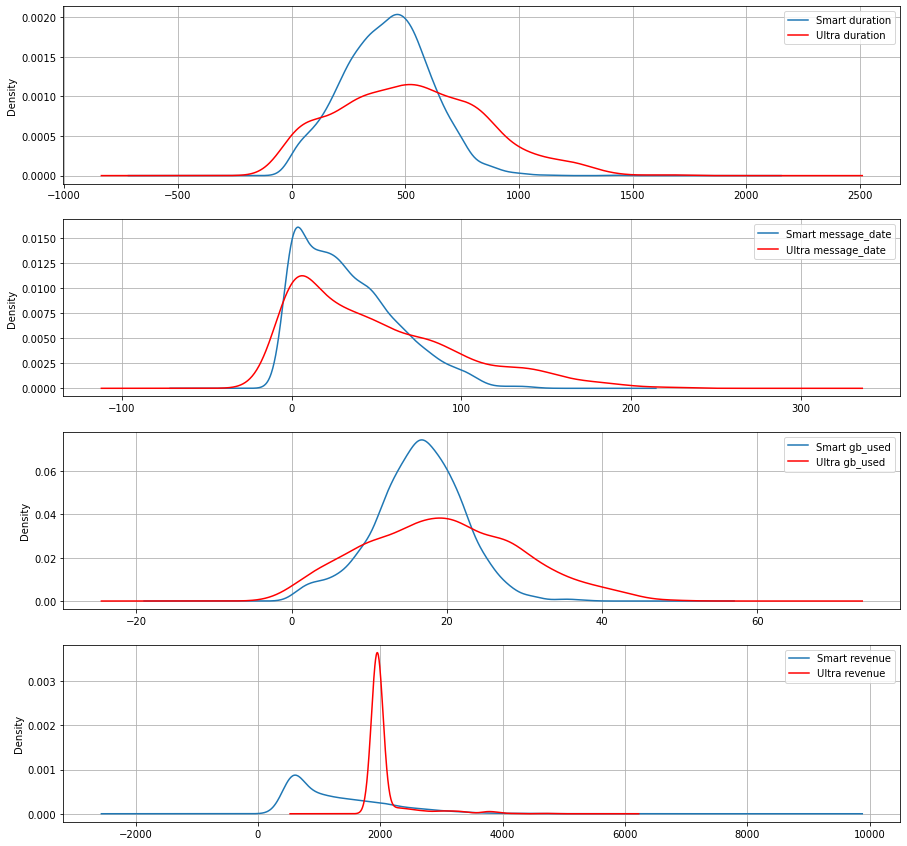

In [102]:
features = ['duration', 'message_date', 'gb_used', 'revenue']

fig, ax = plt.subplots(4)
for num, name in enumerate(features):
    smart[name].plot(ax = ax[num], kind = 'density' , figsize = (15,15), grid =True , label = f'Smart {name}')
    ax[num].legend()
    
    ultra[name].plot(ax = ax[num],kind = 'density' , figsize = (15,15), grid =True , label = f'Ultra {name}',
                     color ='r')
    ax[num].legend()

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>'duration', 'message_date', 'gb_used', 'revenue'</b></font> — опишем распределения по 4 гистограммам
</div>

<b>ДЛИТЕЛЬНОСТИ ЗВОНКОВ (duration)</b> - 1-ый график плотности распределения для среднего значения 
-  <font color='blue'><b>тариф СМАРТ</b> - кривая стремится к нормальному распределению и скошена влево</font>
-  <font color='red'><b>тариф УЛЬТРА</b> - кривая стремится к нормальному распределению и скошена влево</font><br><br>

<b>КОЛИЧЕСТВА СООБЩЕНИЙ (sms)</b> - 2-ой график плотности распределения для среднего значения
-  <font color='blue'><b>тариф СМАРТ</b> - кривая стремится к нормальному распределению и скошена влево</font>
-  <font color='red'><b>тариф УЛЬТРА</b> - кривая стремится к нормальному распределению</font><br><br>

<b>ИНТЕРНЕТ-ТРАФИКА (gb)</b> - 3-ий график плотности распределения для среднего значения
-  <font color='blue'><b>тариф СМАРТ</b> - кривая стремится к нормальному распределению и скошена влево</font>
-  <font color='red'><b>тариф УЛЬТРА</b> - кривая стремится к нормальному распределению и скошена влево</font><br><br>

<b>ВЫРУЧКУ ПОЛЬЗОВАТЕЛЕЙ (revenue)</b> - 4-ый график плотности распределения для среднего значения
-  <font color='blue'><b>тариф СМАРТ</b> - кривая стремится к нормальному распределению и симметричности</font>
-  <font color='red'><b>тариф УЛЬТРА</b> - кривая стремится к нормальному распределению и симметричности</font><br><br>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>'duration', 'message_date', 'gb_used', 'revenue'</b></font> — посмотрим теперь на их среднии
</div>

In [103]:
sm = smart.pivot_table(index='month',values=('duration','message_date','gb_used','revenue'),aggfunc=('mean'))

ul = ultra.pivot_table(index='month',values=('duration','message_date','gb_used','revenue'),aggfunc=('mean'))

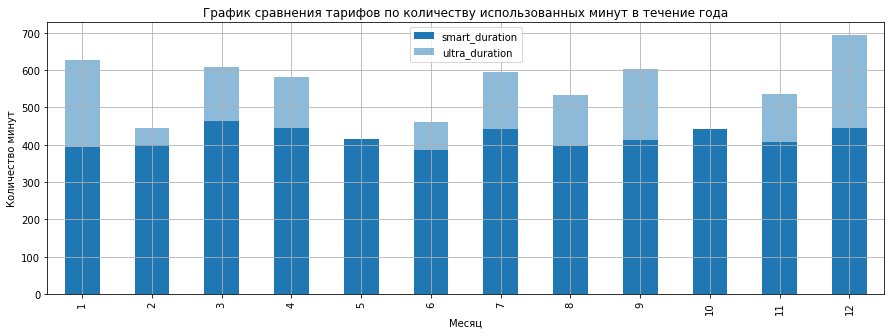

In [104]:
ax=sm.plot(y='duration',grid=True,figsize=(15,5),style='o-',kind='bar',label='smart_duration')

ul.plot(y='duration',grid=True,figsize=(15,5),style='o-',kind='bar',label='ultra_duration',alpha=0.5,ax=ax)
plt.xlabel('Месяц')
plt.ylabel('Количество минут')
plt.title('График сравнения тарифов по количеству использованных минут в течение года')
plt.show()

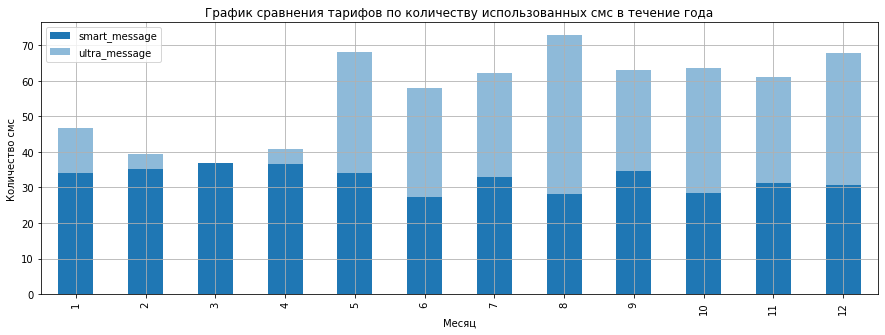

In [105]:
ax=sm.plot(y='message_date',grid=True,figsize=(15,5),style='o-',kind='bar',label='smart_message')

ul.plot(y='message_date',grid=True,figsize=(15,5),style='o-',kind='bar',label='ultra_message',alpha=0.5,ax=ax)
plt.xlabel('Месяц')
plt.ylabel('Количество смс')
plt.title('График сравнения тарифов по количеству использованных смс в течение года')
plt.show()

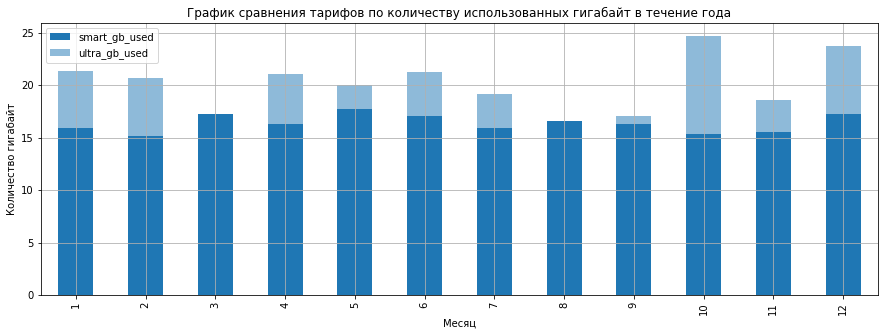

In [106]:
ax=sm.plot(y='gb_used',grid=True,figsize=(15,5),style='o-',kind='bar',label='smart_gb_used')

ul.plot(y='gb_used',grid=True,figsize=(15,5),style='o-',kind='bar',label='ultra_gb_used',alpha=0.5,ax=ax)
plt.xlabel('Месяц')
plt.ylabel('Количество гигабайт')
plt.title('График сравнения тарифов по количеству использованных гигабайт в течение года')
plt.show()

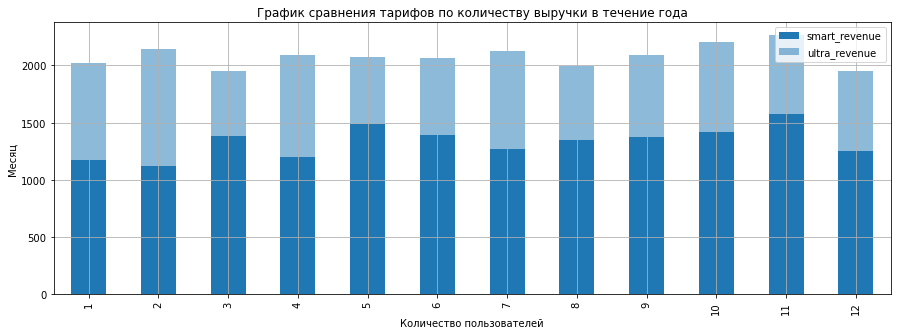

In [107]:
ax=sm.plot(y='revenue',grid=True,figsize=(15,5),style='o-',kind='bar',label='smart_revenue')

ul.plot(y='revenue',grid=True,figsize=(15,5),style='o-',kind='bar',label='ultra_revenue',alpha=0.5,ax=ax)
plt.xlabel('Количество пользователей')
plt.ylabel('Месяц')
plt.title('График сравнения тарифов по количеству выручки в течение года')
plt.show()

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>'duration', 'message_date', 'gb_used', 'revenue'</b></font> — а здесь посмотрим на чистой выборке по тарифам
</div>

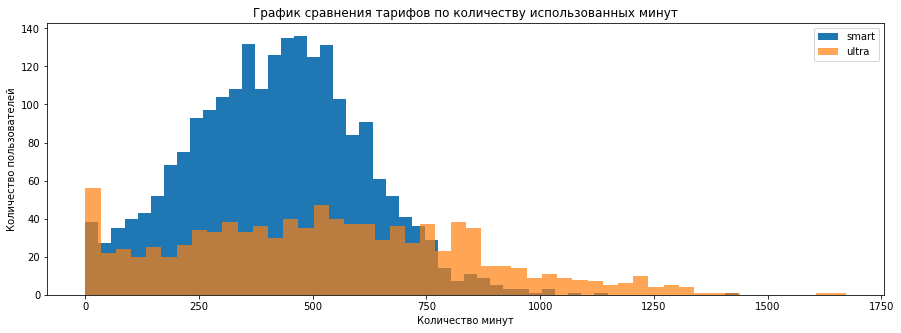

In [108]:
plt.figure(figsize=(15, 5))
plt.hist(smart['duration'], bins=50, label='smart')
plt.hist(ultra['duration'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.xlabel('Количество минут')
plt.ylabel('Количество пользователей')
plt.title('График сравнения тарифов по количеству использованных минут')
plt.show()

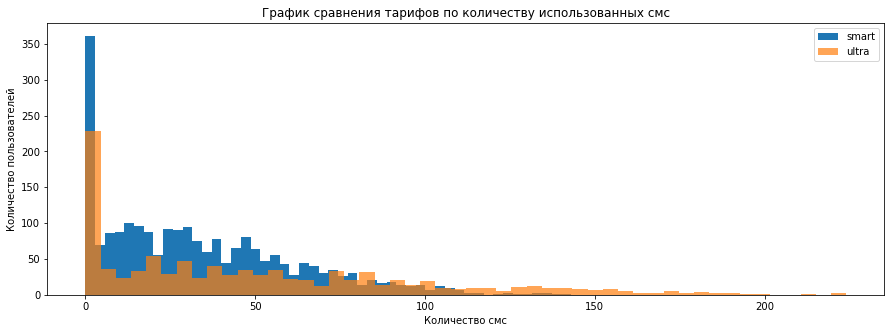

In [109]:
plt.figure(figsize=(15, 5))
plt.hist(smart['message_date'], bins=50, label='smart')
plt.hist(ultra['message_date'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.xlabel('Количество смс')
plt.ylabel('Количество пользователей')
plt.title('График сравнения тарифов по количеству использованных смс')
plt.show()

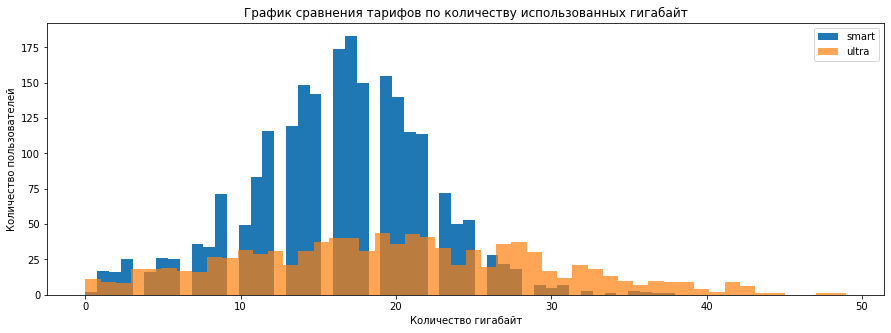

In [110]:
plt.figure(figsize=(15, 5))
plt.hist(smart['gb_used'], bins=50, label='smart')
plt.hist(ultra['gb_used'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.xlabel('Количество гигабайт')
plt.ylabel('Количество пользователей')
plt.title('График сравнения тарифов по количеству использованных гигабайт')
plt.show()

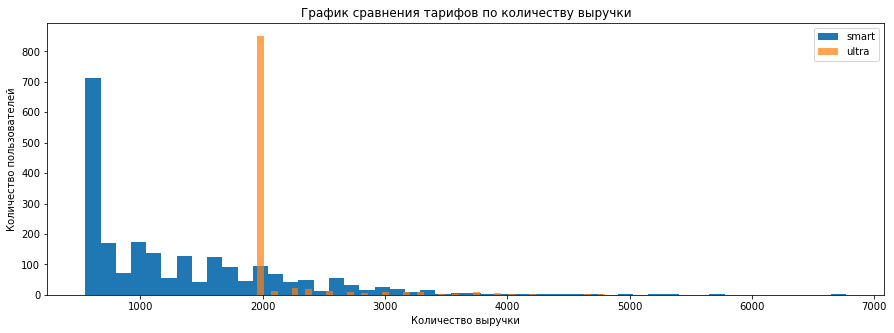

In [111]:
plt.figure(figsize=(15, 5))
plt.hist(smart['revenue'], bins=50, label='smart')
plt.hist(ultra['revenue'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.xlabel('Количество выручки')
plt.ylabel('Количество пользователей')
plt.title('График сравнения тарифов по количеству выручки')
plt.show()

## Шаг 4. Проверить гипотезы

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задать самостоятельно.  

Пояснить:
* как я формулировал нулевую и альтернативную гипотезы;
* какой критерий использовал для проверки гипотез и почему.

### Первая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>mean_revenue_smart</b> и <b>mean_revenue_ultra</b></font> — среднии выручки пользователей тарифов «Ультра» и «Смарт»
</div>

### Вывод по 1-ой гипотезе - Отвергаем нулевую гипотезу

<font color='blue'><b>Нулевая гипотеза:</b></font> средняя выручка совокупности пользователей тарифа СМАРТ равна средней выручке совокупности пользователей тарифа УЛЬТРА.  

<font color='red'><b>Альтернативная гипотеза:</b></font> средняя выручка совокупности пользователей тарифа СМАРТ отличается от средней выручки совокупности пользователей тарифа УЛЬТРА.  

<b>Для проверки гипотезы</b> используем гипотезу о равенстве средних двух генеральных совокупностей поскольку данные были собраны в одном году (2018) и их характеристики схожые.

Выводим на экран среднюю выручку пользователей тарифа СМАРТ по месяцам.

In [112]:
mean_revenue_smart = pd.Series(smart['revenue'])
display(mean_revenue_smart)

3140     550.0
3073    1150.0
2314    1150.0
1931    1350.0
1574     550.0
         ...  
962      550.0
1929    1150.0
2716     598.0
2312    1513.0
1572     550.0
Name: revenue, Length: 2229, dtype: float64

Выводим на экран среднюю выручку пользователей тарифа УЛЬТРА по месяцам.

In [113]:
mean_revenue_ultra = pd.Series(ultra['revenue'])
display(mean_revenue_ultra)

333     1950.0
507     1950.0
2313    1950.0
1930    1950.0
716     1950.0
         ...  
1252    1950.0
1569    2400.0
2713    1950.0
1925    1950.0
2309    3300.0
Name: revenue, Length: 985, dtype: float64

Проверим гипотезу о равенстве средних двух независимых совокупностей.

In [114]:
results = st.ttest_ind(mean_revenue_ultra, mean_revenue_smart)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу


### Вторая гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<font color='purple'><b>mean_revenue_moscow</b> и <b>mean_revenue_not_moscow</b></font> — среднии выручки пользователей из Москвы и регионов
</div>

### Вывод по 2-ой гипотезе - Не получилось отвергнуть нулевую гипотезу

<font color='blue'><b>Нулевая гипотеза:</b></font> средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.  

<font color='red'><b>Альтернативная гипотеза:</b></font> средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.  

<b>Для проверки гипотезы</b> используем гипотезу о равенстве средних двух генеральных совокупностей поскольку данные были собраны в одном году (2018) и их характеристики схожые.

Сохраним выборку только по Москве.

In [115]:
moscow = full_data.query('city == "Москва"')
display(moscow)

,user_id,message_date,duration,gb_used,age,city,tariff,month,revenue
3140,1001,0.0,414.0,14.0,41,Москва,smart,11,550.0
3073,1001,0.0,430.0,18.0,41,Москва,smart,11,1150.0
2315,1003,75.0,802.0,10.0,23,Москва,ultra,8,1950.0
1932,1003,94.0,824.0,12.0,23,Москва,ultra,8,1950.0
1257,1003,91.0,961.0,13.0,23,Москва,ultra,8,1950.0
...,...,...,...,...,...,...,...,...,...
1566,1490,48.0,322.0,15.0,30,Москва,smart,4,550.0
1249,1490,50.0,346.0,17.0,30,Москва,smart,4,950.0
2709,1490,46.0,290.0,16.0,30,Москва,smart,4,750.0
504,1490,37.0,339.0,21.0,30,Москва,smart,4,1750.0


Сохраним выборку только по регионам.

In [116]:
not_moscow = full_data.query('city != "Москва"')
display(not_moscow)

,user_id,message_date,duration,gb_used,age,city,tariff,month,revenue
333,1000,22.0,159.0,3.0,52,Краснодар,ultra,5,1950.0
507,1000,60.0,172.0,23.0,52,Краснодар,ultra,5,1950.0
2313,1000,70.0,333.0,10.0,52,Краснодар,ultra,5,1950.0
1930,1000,58.0,338.0,15.0,52,Краснодар,ultra,5,1950.0
716,1000,75.0,340.0,14.0,52,Краснодар,ultra,5,1950.0
...,...,...,...,...,...,...,...,...,...
962,1498,20.0,175.0,8.0,68,Владикавказ,smart,7,550.0
1929,1499,48.0,449.0,18.0,35,Пермь,smart,9,1150.0
2716,1499,66.0,492.0,13.0,35,Пермь,smart,9,598.0
2312,1499,59.0,612.0,18.0,35,Пермь,smart,9,1513.0


Оставим только выручку пользователей по Москве и сбросим индекс датасета.

In [117]:
revenue_moscow = pd.Series(moscow['revenue'])
display(revenue_moscow)

3140     550.0
3073    1150.0
2315    1950.0
1932    1950.0
1257    1950.0
         ...  
1566     550.0
1249     950.0
2709     750.0
504     1750.0
1922    1750.0
Name: revenue, Length: 611, dtype: float64

Также оставим только выручку пользователей по регионам и сбросим индекс датасета.

In [118]:
revenue_not_moscow = pd.Series(not_moscow['revenue'])
display(revenue_not_moscow)

333     1950.0
507     1950.0
2313    1950.0
1930    1950.0
716     1950.0
         ...  
962      550.0
1929    1150.0
2716     598.0
2312    1513.0
1572     550.0
Name: revenue, Length: 2603, dtype: float64

Проверим гипотезу о равенстве средних двух независимых совокупностей.

In [119]:
results_2 = st.ttest_ind(revenue_moscow, revenue_not_moscow)

print('p-значение: ', results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


## Шаг 5. Написать общий вывод

<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<font color='green'><b>ВЫВОД:</b></font><br>
Наш главный вывод проекта - очевидно, что финансово выгоднее оказался тариф УЛЬТРА т.к. средняя выручка в расчете на одного клиента выше аналогичного показателя второго тарифа.
<br>   

Однако тариф СМАРТ расчитан на более широкую аудиторию и имеет хороший потенциал к увеличению выручки. Что как раз мы и можем наблюдать уже на текущих цифрах т.к. общая выручка тарифа СМАРТ, выше выручки тарифа УЛЬТРА.
<br>

Рекомендую по тарифу СМАРТ сократить абонентскую стоимость на 50 руб. и снизить бесплатные пороги до 400 минут и 14 ГБ. Таким образом за счет экстра бонусов компания может значимо прирости в выручке. Параметры тарифа УЛЬТРА, я бы рекоммендовал не корректировать т.к. на них уже сформировалась определенная группа клиентов, которым комфортно платить повышенную стоимость за все услуги заранее и не думать о лимитах.
<br>

<font color='blue'><b>тариф СМАРТ</b></font><br>  
В ходе анализа данных тарифа СМАРТ, мы получили, что среднее потребление пользователей перевышает тарифный пакет услуг и его выручка состовляет 705 рублей. 99% выручки пользователей находится в интервале от 550 до 1797 рублей. По графику плотности распределения средней выручки можно отметить, что выручка часто превышает базовую ежемесячную оплату. Интервал пользования интернет-трафиком от 6 от 22 Гб. Интервал пользования звонков от 174 до 607 мин. Можно отметить, что превышение выручки вероятнее всего складывается из-за превышения лимита по интернет-трафику.
<br>

Всего клиентов <font color='blue'><b>тарифа СМАРТ:</b></font> <b>350</b><br>  
Общая выручка: <b>2 875 351 руб.</b><br>  
Средняя выручка на одного клиента: <b>8 215 руб.</b>
<br>

<font color='red'><b>тариф УЛЬТРА</b></font><br>  
Среднее потребление пользователей тарифа УЛЬТРА перевышает тарифный пакет услуг и его средная выручка состовляет 1960 рублей. 99% выручки пользователей находится в интервале от 1950 до 2202 рублей. По графику плотности распределения средней выручки можно отметить, что выручка часто превышает базовую ежемесячную оплату. Интервал пользования интернет-трафиком от 10 до 26 Гб. Интервал пользования звонков от 265 до 761 мин. Можно отметить, что превышение выручки вероятнее всего складывается из-за превышения лимита по интернет-трафику.
<br>

Всего клиентов <font color='red'><b>тарифа УЛЬТРА:</b></font> <b>148</b><br>  
Общая выручка: <b>2 039 100 руб.</b><br>  
Средняя выручка на одного клиента: <b>13 778 руб.</b>
<br>

<font color='blue'><b>Первую гипотезу</b> - ОТВЕРГАЕМ</font><br>  
Средняя выручка совокупности пользователей тарифа СМАРТ отличается от средней выручки совокупности пользователей тарифа УЛЬТРА.
<br>

<font color='red'><b>Вторую гипотезу</b> - ОТВЕРГНУТЬ НЕ МОЖЕМ</font><br>  
Средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов.
<br>

</div>